<a href="https://colab.research.google.com/github/kserdem/Istatistiksel_Analizler/blob/main/Korelasyon_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Veri Setlerinin Oluşturulması

* Pozitif Korelasyon

In [5]:
pozitif_corr= pd.DataFrame({'sicaklik':[28,33,17,25,13,27,14,30,15,14,33,32,19,11,14,17,34,24,27],
                            'dondurma_satisi': [8,10,2,5,3,11,1,15,2,4,10,12,4,0,1,2,15,6,8]})
pozitif_corr.head()

,sicaklik,dondurma_satisi
0,28,8
1,33,10
2,17,2
3,25,5
4,13,3


* Negatif Korelasyon

In [6]:
negatif_corr= pd.DataFrame({'mutluluk':[8,7,2,5,6,8,9,10,4,1,1,3,5,7,6,9,10,5,4,8],
                            'kaygı_seviyesi': [2,2,9,4,3,2,1,0,5,10,10,4,6,2,3,1,1,6,8,3]})
negatif_corr.head()

,mutluluk,kaygı_seviyesi
0,8,2
1,7,2
2,2,9
3,5,4
4,6,3


* Korelasyon Yok

In [7]:
nötr_corr= pd.DataFrame({'tv_izleme_suresi':[8,7,2,5,6,8,9,10,4,1,1,3,5,7,6,9,10,5,4,8],
                            'elbise_satisi': [22,15,13,25,11,10,18,19,32,12,14,15,18,22,20,27,26,23,14,15]})
nötr_corr.head()

,tv_izleme_suresi,elbise_satisi
0,8,22
1,7,15
2,2,13
3,5,25
4,6,11


# Doğrusallığın Görselleştirilmesi

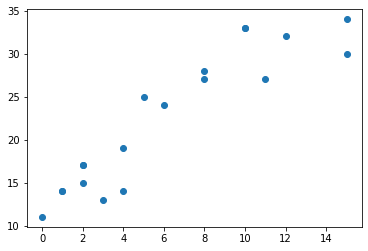

In [8]:
plt.scatter(pozitif_corr['dondurma_satisi'], pozitif_corr['sicaklik'])
plt.show()

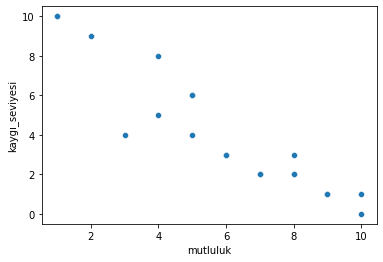

In [9]:
sns.scatterplot(data=negatif_corr,x=negatif_corr['mutluluk'], y=negatif_corr['kaygı_seviyesi'])

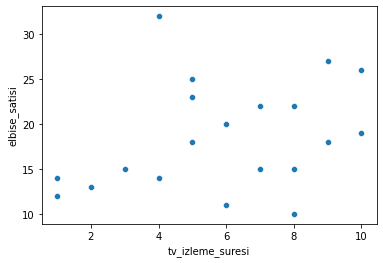

In [10]:
sns.scatterplot(data=nötr_corr,x=nötr_corr['tv_izleme_suresi'], y=nötr_corr['elbise_satisi'])

# Pandas ile Korelasyon Analizi
* Default olarak pearson korelasyon katsayısını kullanır.

## Pozitif İlişki

In [11]:
pozitif_corr['dondurma_satisi'].corr(pozitif_corr['sicaklik'])

0.918511316405559

In [12]:
pozitif_corr.corr()

,sicaklik,dondurma_satisi
sicaklik,1.000000,0.918511
dondurma_satisi,0.918511,1.000000


* Spearman Katsayısı

In [13]:
pozitif_corr['dondurma_satisi'].corr(pozitif_corr['sicaklik'],method='spearman')

0.9015021185424552

In [14]:
pozitif_corr.corr(method='spearman')

,sicaklik,dondurma_satisi
sicaklik,1.000000,0.901502
dondurma_satisi,0.901502,1.000000


* Kendall Katsayısı

In [15]:
pozitif_corr['dondurma_satisi'].corr(pozitif_corr['sicaklik'],method='kendall')

0.7683069659820713

In [16]:
pozitif_corr.corr(method='kendall')

,sicaklik,dondurma_satisi
sicaklik,1.000000,0.768307
dondurma_satisi,0.768307,1.000000


## Negatif İlişki

In [21]:
negatif_corr.corr()

,mutluluk,kaygı_seviyesi
mutluluk,1.000000,-0.926889
kaygı_seviyesi,-0.926889,1.000000


In [22]:
negatif_corr.corr(method='spearman')

,mutluluk,kaygı_seviyesi
mutluluk,1.000000,-0.950099
kaygı_seviyesi,-0.950099,1.000000


In [23]:
negatif_corr.corr(method='kendall')

,mutluluk,kaygı_seviyesi
mutluluk,1.000000,-0.866887
kaygı_seviyesi,-0.866887,1.000000


##İlişki Yok

In [24]:
nötr_corr.corr()

,tv_izleme_suresi,elbise_satisi
tv_izleme_suresi,1.000000,0.307606
elbise_satisi,0.307606,1.000000


In [25]:
nötr_corr.corr(method='spearman')

,tv_izleme_suresi,elbise_satisi
tv_izleme_suresi,1.000000,0.352407
elbise_satisi,0.352407,1.000000


In [26]:
nötr_corr.corr(method='kendall')

,tv_izleme_suresi,elbise_satisi
tv_izleme_suresi,1.000000,0.254179
elbise_satisi,0.254179,1.000000


# SciPy ile Korelasyon Analizi

In [17]:
import scipy.stats

* Pearson Katsayısı

In [19]:
r, p = scipy.stats.pearsonr(pozitif_corr['sicaklik'], pozitif_corr['dondurma_satisi'])
print(r,p)

0.9185113164055592 2.901513894542322e-08


In [20]:
np.corrcoef(pozitif_corr['sicaklik'], pozitif_corr['dondurma_satisi'])

array([[1.        , 0.91851132],
       [0.91851132, 1.        ]])

* Spearman Katsayısı

In [27]:
r, p = scipy.stats.spearmanr(negatif_corr['kaygı_seviyesi'], negatif_corr['mutluluk'])
print(r,p)

-0.9500986162296566 1.5195514411700465e-10


In [28]:
np.corrcoef(negatif_corr['kaygı_seviyesi'], negatif_corr['mutluluk'])

array([[ 1.        , -0.92688889],
       [-0.92688889,  1.        ]])

# Korelasyon Isı Haritalarının İncelenmesi


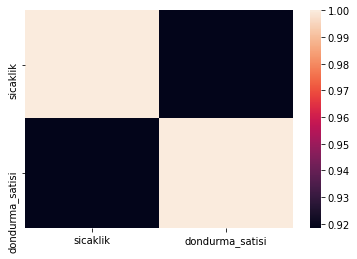

In [32]:
sns.heatmap(pozitif_corr.corr())

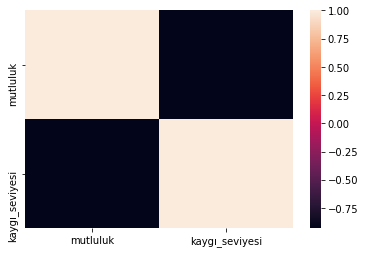

In [33]:
sns.heatmap(negatif_corr.corr())

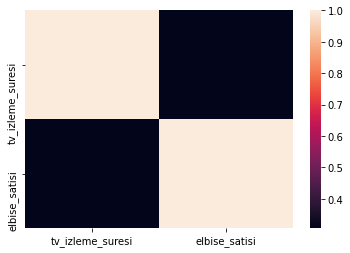

In [34]:
sns.heatmap(nötr_corr.corr())

# Kısmi Korelasyonun hesaplanması

In [38]:
partial_corr= pd.DataFrame({'sicaklik':[28,33,17,25,13,27,14,30,15,14,33,32,19,11,14,17,34,24,27,33,30,28,27,24,23],
                            'dondurma_satisi': [8,10,2,5,3,11,1,15,2,4,10,12,4,0,1,2,15,6,8,11,13,14,20,15,13],
                            'turist':[50,40,26,52,20,19,33,42,26,35,41,22,34,36,20,30,10,40,35,36,25,34,22,40,25]})
partial_corr.head()

,sicaklik,dondurma_satisi,turist
0,28,8,50
1,33,10,40
2,17,2,26
3,25,5,52
4,13,3,20


In [39]:
partial_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sicaklik         25 non-null     int64
 1   dondurma_satisi  25 non-null     int64
 2   turist           25 non-null     int64
dtypes: int64(3)
memory usage: 728.0 bytes


In [40]:
partial_corr.corr()

,sicaklik,dondurma_satisi,turist
sicaklik,1.000000,0.792948,0.116794
dondurma_satisi,0.792948,1.000000,-0.105699
turist,0.116794,-0.105699,1.000000


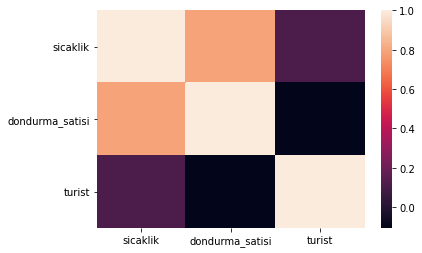

In [41]:
sns.heatmap(partial_corr.corr())

In [43]:
! pip install pingouin

     |████████████████████████████████| 205 kB 7.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=a20b3819aef0a95f01f0d53cdc1fbc583086892ca4a57e04b42e28ca56fd7e2f
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=6f232081966474a3ed369f4c6de32bdf155bcbf413925d6a37264c73a370f3ad
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [44]:
import pingouin as pg

* Daha fazla değişken olduğunda covar=['X1','X2','X3] şeklinde eklemeler yaparak ikili değişkenlerin korelasyonunu inceleyebilirsiniz.

In [45]:
partial_corr.partial_corr(x='dondurma_satisi', y='turist', covar=['sicaklik'],
                method='spearman').round(3)

,n,r,CI95%,p-val
spearman,25,-0.395,"[-0.69, 0.01]",0.056


In [46]:
partial_corr.partial_corr(x='dondurma_satisi', y='sicaklik', covar=['turist'],
                method='spearman').round(3)

,n,r,CI95%,p-val
spearman,25,0.78,"[0.55, 0.9]",0.0


In [47]:
# altermatif olarak
pg.partial_corr(data=partial_corr,x='dondurma_satisi', y='sicaklik', covar=['turist'],
                method='spearman').round(3)

,n,r,CI95%,p-val
spearman,25,0.78,"[0.55, 0.9]",0.0


In [48]:
pg.partial_corr(data=partial_corr,x='dondurma_satisi', y='sicaklik', covar=['turist'],
                method='pearson').round(3)

,n,r,CI95%,p-val
pearson,25,0.815,"[0.61, 0.92]",0.0
